### Predicting Airline passenger satisfaction

# Predicting Airline passenger satisfaction

You are given a dataset that holds information from a passenger survey.
Your job is to build an ML model that can predict passenger satisfaction given information about their travel.
\[**Total marks: 20**\]

#### Dataset ####
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Marking scheme ###
Work on this notebook by adding your code and comments below. Please make sure you explain your steps and report your findings within the notebook. The marking scheme bellow gives you an indication of what you are expected to do.

Overall presentation and quality of notebook \[**5 marks**\]

Data preprocessing \[**6 marks**]
- Initial observations
    - Check for null values
    - Check for duplicates
    - Check for unusual values or data types
    - Write your observations
- Exploratory Data Analysis 
    - Explore distributions of feature values
    - Investigate correlations between features
        - Hint: if you want to select only numerical features from your dataset use the pandas function `<dataset>.select_dtypes(include='number')`
    - Write your observations
- Cleaning
    - Remove unnecessary features and/or fix missing values if necessary

Data encoding \[**3 marks**]
- Apply appropriate data encoding
  - check for binary values (one or the other) or values that reflect an order - these are ordinal values
  - check for features where the values don't reflect any order - these are nominal values
- Report your steps and decisions as you apply them

Train a classifier \[**4 marks**]
- Consider how you will split your train/test data
- Select an appropriate classifier and train it over the dataset
- Report the performance with appropriate metrics (e.g. f1 score, confusion matrix)

Fine tuning \[**2 marks**\]
- Fine tune the model's parameters
    - This can be time consuming process. For the purposes of the assignment you can limit the range of parameters and values you search through.
- Re-evaluate your fine-tuned model
- Repor the performance








In [4]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
airline=pd.read_csv('dataset/airline.csv')

In [5]:
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [7]:
airline.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Observations
1)  Type of travel,Gender,Customer type contains binary  values.
2)  Customer type ,class of travel, and Satisfaction  contain ordinal values from which an ordering can be inferred.
3) Missing values for Arrival delay in minuites
4) Age have numeric values. It would be more informative to categorise customers based on their age as we would like our model to learn which aspects of our service affect the the satisfaction rate for different passenger age groups.
5) At first it might be tempting to remove the delay in departure column as it would be reflected in the arrival time anyway. However,we would like our model to capture the  possibility  where a customer had to wait for longer time at the gate which they were not satisfied with and its effect on  their overall satisfaction.
6) Departure and arrival delay is given in minuites. It would be better if we convert it into hours as it would be easier to visualise any outliers. 

# Next steps
1) Perform ordinal  encoding for  type of travel and gender.
2) Perform ordinal encoding for class of travel,Satisfaction and Customer Type
3) as we know the minum and maximum age of our passengers we can Categorically assign  passengers as child(7-12),adult(12-60) and senior(60-100)   
4) It would be safe to replace the delay in arrival time by the delay in departure time for all null values.
5) Plot the distribution of  each feature and look for outliers, and identify the kind of distribution(i.e uniform distribution and normal distribution). Further segregate the dataset further by different age categories and look for  possible anomalies. For instance, it would be unusual to  find a child travelling for business purposes. 
6) Convert departure delay  minuites into hours.

# Performing pre processing

## Data encoding

Perform Ordinal encoding(step  1)

In [8]:
from category_encoders.ordinal import OrdinalEncoder
maplist=[{'col':'Customer Type','mapping':{'disloyal Customer':0,'Loyal Customer':1}},
         {'col':'Class','mapping':{'Eco':1,'Eco Plus':2,'Business':3}},
         {'col':'satisfaction','mapping':{'neutral or dissatisfied':0,'satisfied':1}},
         {'col':'Gender','mapping':{'Male':0,'Female':1}},
         {'col':'Type of Travel','mapping':{'Personal Travel':0,'Business travel':1}}
]
oenc=OrdinalEncoder(mapping=maplist)

airline_tf=oenc.fit_transform(airline)


In [9]:
airline_tf.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,3,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,3,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,3,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,3,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Disecretize Age (step 2)

In [10]:
import pandas as pd




# Define bins and labels
bins = [7, 12, 60, 100]
labels = [0, 1, 2]

# Create a new column with the categories
airline_tf['Category'] = pd.cut(airline_tf['Age'], bins=bins, labels=labels, right=False)

airline_tf.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Category
0,70172,0,1,13,0,2,460,3,4,3,...,4,3,4,4,5,5,25,18.0,0,1
1,5047,0,0,25,1,3,235,3,2,3,...,1,5,3,1,4,1,1,6.0,0,1
2,110028,1,1,26,1,3,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,1,1
3,24026,1,1,25,1,3,562,2,5,5,...,2,5,3,1,4,2,11,9.0,0,1
4,119299,0,1,61,1,3,214,3,3,3,...,3,4,4,3,3,3,0,0.0,1,2


In [11]:
airline_tf["Category"].unique()

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]

In [12]:
airline_tf[airline_tf["Category"]==0]["Age"].unique()

array([ 9, 11,  8, 10,  7])

In [13]:
airline_tf[airline_tf["Category"]==1]["Age"].unique()

array([13, 25, 26, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 17, 43, 58, 23,
       57, 49, 36, 22, 31, 15, 35, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27,
       48, 59, 46, 30, 44, 51, 32, 19, 42, 16, 56, 55, 18, 14])

In [14]:
airline_tf[airline_tf["Category"]==2]["Age"].unique()

array([61, 67, 69, 60, 66, 64, 62, 68, 65, 72, 70, 63, 80, 74, 71, 85, 73,
       76, 77, 75, 79, 78])

In [15]:
airline_tf=airline_tf.drop(['Age'], axis=1).copy()

Convert minuites into hours and replacing null values.

In [16]:
airline_tf['Departure Delay in Minutes']=airline_tf['Departure Delay in Minutes']/60
airline_tf['Arrival Delay in Minutes']=airline_tf['Arrival Delay in Minutes']/60
airline_tf['Delay in flight']=airline_tf['Arrival Delay in Minutes']-airline_tf['Departure Delay in Minutes']

Replac null values (step 4)

In [17]:
airline_tf['Arrival Delay in Minutes'] = airline_tf['Arrival Delay in Minutes'].fillna(airline_tf['Departure Delay in Minutes'])

Check if null values replaced and prresence of new  numeric columns

In [18]:
airline_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   Gender                             129880 non-null  int64   
 2   Customer Type                      129880 non-null  int64   
 3   Type of Travel                     129880 non-null  int64   
 4   Class                              129880 non-null  int64   
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  int64   
 7   Departure/Arrival time convenient  129880 non-null  int64   
 8   Ease of Online booking             129880 non-null  int64   
 9   Gate location                      129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Online boarding           

## Data cleaning

Let us check if there was delay in flight that is greater than longest reorded flight time which is of 18 hours. 


In [19]:
outliers=airline_tf[airline_tf['Delay in flight']>=18]
outliers.shape

(0, 25)

Let us check if there passsengers who are categorised as child(7-11 yrs) travelled for business purposes.

In [20]:
outliers=airline_tf[((airline_tf['Category'] == 0) & (airline_tf['Type of Travel'] == 1))]
outliers.shape

(845, 25)

There are 845 such records. As these records are small in numbers we choose to drop them.

In [21]:
airline_tf=airline_tf[~((airline_tf['Category'] == 0) & (airline_tf['Type of Travel'] == 1))]

Check if outliers removed

In [22]:
airline_tf.shape

(129035, 25)

Check for duplicates

In [45]:
airline_tf[airline_tf.duplicated()]

,id,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Category,Delay in flight


No duplicates found.

# Exploratory Data analysis

Now that we have done the necessary transfomrations let us now examine the following

1) Frequency distribution. We would like to see if the distibution is normally distrbuted or skewed.

2) Correlation of each feature with the satisfaction. Specifically we would like to find out which feature appears to be positively closely related to satisfaction.

Plotting frequency distribution of each feature

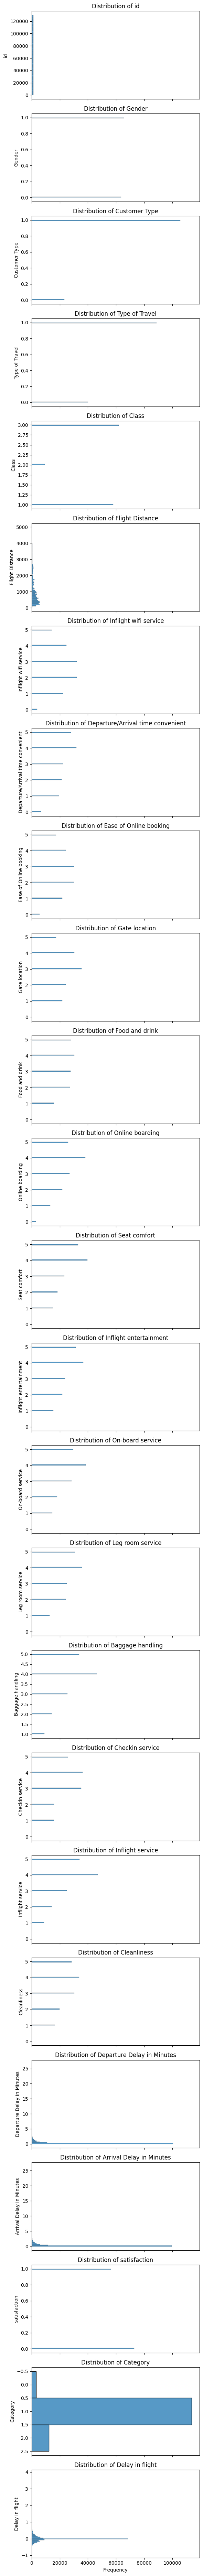

In [23]:
import seaborn as sns
 
num_features = len(airline_tf.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(6, num_features * 3), sharex=True)
for i, feature in enumerate(airline_tf.columns):
    sns.histplot(y=airline_tf[feature], bins=100, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Observations
1) The dataset appears to be normally distributed with respect to all satisfaction ratings. If the mean satisfaction score for a particular  type of service is high(i.e 4 or 5), that sevice would be considered as a strength. A service with low mean rating(i.e 1 or 2) could be an area of improvement. 

2) The histogram plot for departure delay is skewed towards 0 houra. This sugests that flights are very punctual.

2) There are many adults in our dataset and very less childeren and senior. This makes it difficult to determine which aspects of the service make childeren and old passengers satisfied. Hence we would need to stratisy our training data to include passengers of all kinds of age groups.
3) There are very few passengers travelling on the eco + class compared to the other classes. 

# Next steps

2) Note the  features that have have a high correlation with the overall satisfaction.  Segregate the dataset based on the age of the passengers. For each data set identify  the features that are  highly correlated with the overall satisfaction.

3) create a training set by sampling  records from each of the dataset to ensure stratification based on age group and class






# Analysing correlations

Check correlation of attributes with satisfaction

In [24]:
cols=list(airline_tf.columns)
service=[col for col in cols if '_' not in col and col not in ['Category','Customer Type','Flight Distance']]
air=airline_tf[service]
correlations=air.corr(method='kendall')
c= correlations['satisfaction'].abs().sort_values(ascending=False)
c


satisfaction                         1.000000
Online boarding                      0.492502
Class                                0.480693
Type of Travel                       0.453636
Inflight entertainment               0.359243
Seat comfort                         0.325580
On-board service                     0.295113
Leg room service                     0.286096
Cleanliness                          0.273648
Inflight wifi service                0.256312
Baggage handling                     0.245595
Inflight service                     0.241059
Checkin service                      0.209078
Food and drink                       0.186014
Ease of Online booking               0.155539
Arrival Delay in Minutes             0.088425
Departure Delay in Minutes           0.060813
Departure/Arrival time convenient    0.047576
Delay in flight                      0.020164
Gender                               0.011129
id                                   0.010951
Gate location                     

# Observation
1) It can be observed Online boarding appears to be highly correlated with satisfaction, as compared to other factors such as Onboard service and inflight service, which are common  metrics by which arlines are judged.  We would like to see if this holds when we segment our customers based on categories like Age, type of travel  and customer type

# Next steps

1) Segment customers by feautures age ,and type of travel taking one feature at a time and note the features that are highly correlated with our target variable.

2) Segement customers by all of the features at the same time mentioned above and identify the feature highly correlsted to the satosfaction for that segment. 


Segregate the dataset bu Age , type of travel , and Customer type  taking one feature at a time. For each segregated dataset note the feature that is is highly correlated with satisfaction

In [25]:
# Function to segment data set by feature and then find the highest correlated feature to the target
def find_imp_feature(df,segment_feature,target):
    
    vals=list(df[segment_feature].unique())
    
    res=[]
  
    
    for val in vals:
        segment=df[df[segment_feature]==val]
        correlations=segment.corr(method='kendall',numeric_only=True)
        feature_imp=correlations[target].sort_values(ascending=False)
        feature_imp=pd.DataFrame(feature_imp).transpose().drop(['Type of Travel','Class',target],axis=1).copy()
        imp_feature=list(feature_imp.columns)[0]
        value=feature_imp[imp_feature].unique()[0]
        res.append({"criterion":f"{segment_feature}={val}",
                "Feature with highest correlation":imp_feature,
                "Value":value
                
                })
    return res
        
        
correlational_df=[] 
customer_segments=['Category','Type of Travel','Class','Customer Type']


for feature in customer_segments:
    for criterion in find_imp_feature(airline_tf,feature,'satisfaction'):
        correlational_df.append(criterion)
df=pd.DataFrame(correlational_df)
df.head(len(correlational_df))
    

,criterion,Feature with highest correlation,Value
0,Category=1,Online boarding,0.513971
1,Category=2,Leg room service,0.347105
2,Category=0,Inflight wifi service,0.282903
3,Type of Travel=0,Inflight wifi service,0.270037
4,Type of Travel=1,Online boarding,0.547665
5,Class=2,Inflight wifi service,0.451511
6,Class=3,Online boarding,0.504957
7,Class=1,Inflight wifi service,0.418708
8,Customer Type=1,Online boarding,0.492113
9,Customer Type=0,Inflight wifi service,0.410370


## Observations
For some sgements it does appear that online boarding is highly corrleated to their overall satisfaction, but not all. This is true for all sgementing consiting of all adults(category=1) and segemnts where all passengers are loyal(Customer Type=1	) and cusstomers who only travel for business. Inflight Wifi service is another feature that appears to be lstrongly linked to satisfaction for passengers belonging to ohter segements (like classs=1 ,categroy=1 ) and so on.

In [26]:
df=[]
for age in airline_tf['Category'].unique():
    age_grp=airline_tf[airline_tf['Category']==age]
    for tt in age_grp['Type of Travel'].unique():
        tt_grp=age_grp[age_grp['Type of Travel']==tt]
        for Class in tt_grp['Class'].unique():
            class_grp=tt_grp[tt_grp['Class']==Class]
            for ctype in class_grp['Customer Type'].unique():
                ctgrp=class_grp[class_grp['Customer Type']==ctype]
                count=len(ctgrp)
                x=dict(ctgrp['satisfaction'].value_counts())
                correlations=ctgrp.corr(method='kendall',numeric_only=True)
                c=correlations['satisfaction'].sort_values(ascending=False)
                c=pd.DataFrame(c).transpose()
                c=c.drop(['id','Gender','satisfaction','Type of Travel'],axis=1).copy()
                imp_feature=list(c.columns)[0]
                value=c[imp_feature].unique()[0]
                rec={"Category":age,"Type of Travel":tt,"Class":Class,"Customer Type":ctype,"Feature with highest correlation":imp_feature,"value":value,"count":count}
                df.append(rec)
                
corr_df=pd.DataFrame(df)
corr_df.head(len(df))
                

,Category,Type of Travel,Class,Customer Type,Feature with highest correlation,value,count
0,1,0,2,1,Inflight wifi service,0.248776,3346
1,1,0,2,0,Customer Type,NaN,4
2,1,0,1,1,Inflight wifi service,0.276039,24685
3,1,0,1,0,Inflight wifi service,0.329517,134
4,1,0,3,1,Inflight wifi service,0.282727,1998
5,1,0,3,0,Customer Type,NaN,7
6,1,1,3,0,Inflight wifi service,0.467562,8936
7,1,1,3,1,Inflight entertainment,0.516712,46760
8,1,1,1,0,Inflight wifi service,0.341189,12852
9,1,1,1,1,Inflight entertainment,0.595122,10601


# Observations
 
 After further segmenting senior (category=2) , we can observe that inflight wifi service appears to be highly correlated to their overall satisfaction for those travelling in eco and eco+ class.
The same applies to adults, where for some segment in flight wifi service and entertainment appear to be more highly correlated. Hence, it would be desirable to train a model that is able to uncover insight by segmenting customers based on multiple attributes. We choose decision trees , as it not only can exploit segmentation but also easily interpretable.



# Creation of test and training set

We split the dataset into test set and training set. The training set will be stratified with respect to Category and class as these distibutionare skewed

In [27]:
from sklearn.model_selection import train_test_split
X=airline_tf.drop(['satisfaction'], axis=1).copy()
y=airline_tf['satisfaction']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X[["Category","Class"]], random_state=42
)


Check if training set is balanced

<Axes: >

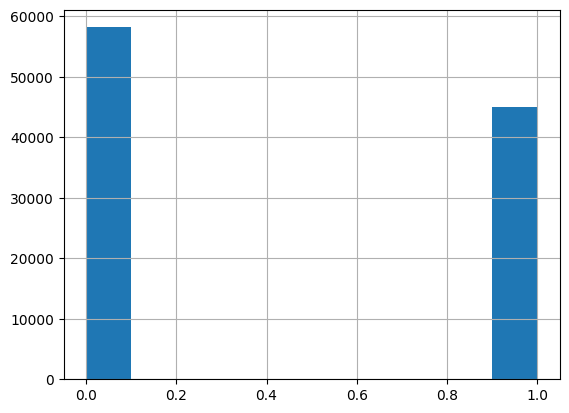

In [29]:
y_train.hist()

<Axes: >

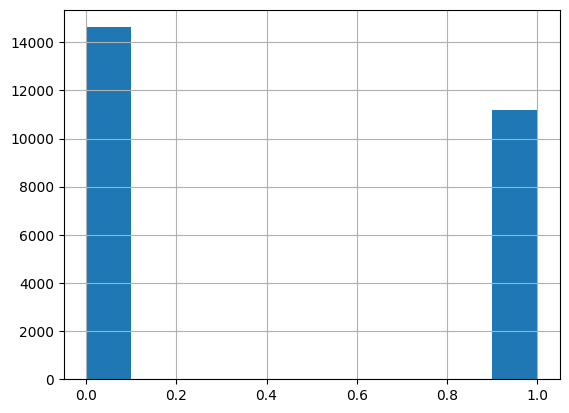

In [30]:
y_test.hist()

Training set and test set appear to be balanced with respect to the target attribute(satidfaction).

Check if senior and childeren are included in training and test set.

<Axes: >

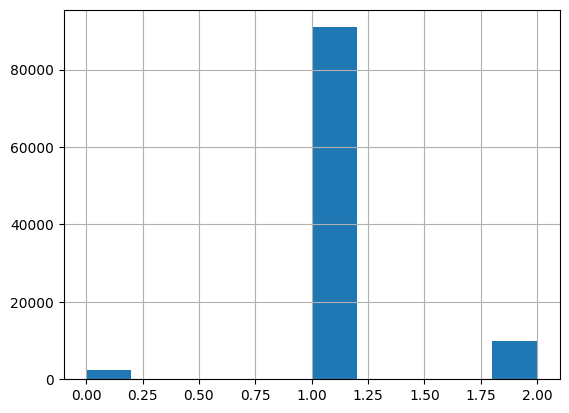

In [46]:
X_train["Category"].hist()

<Axes: >

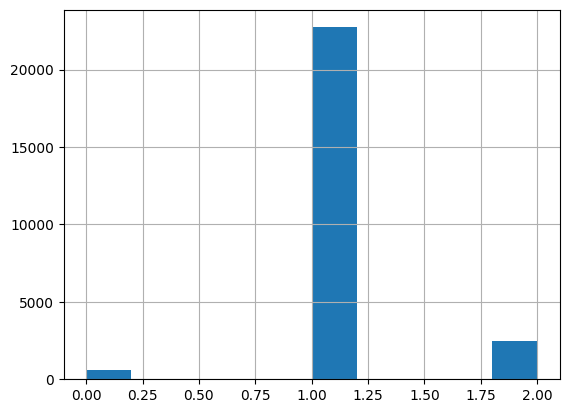

In [48]:
X_test["Category"].hist()

The proportion of age group appear to be preserved.

<Axes: >

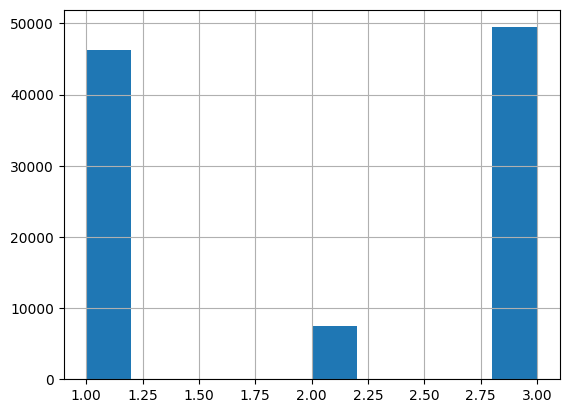

In [49]:
X_train["Class"].hist()

<Axes: >

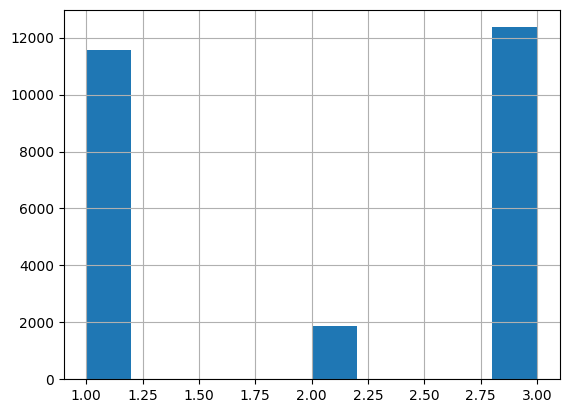

In [50]:
X_test["Class"].hist()

Traing and Test set appears to be maintain proportion of all class of travel.

## Training a classifier

As the our dataset is well balanced we choose to measure the performance of the model by accuracy. 

In [ ]:
# Create a Decision Tree Classifier

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
clf = dtree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9446661758437633


This is a very high accuracy score.  Let us try to collect some information about our classifier such as the numer of leaf nodes and the depth of the tree. We use this as our basis to compute the best parameters for the model to further enhance the performance.

In [36]:
print(clf.get_depth())

45


In [37]:
print(clf.get_n_leaves())

3872


We now decide on range of values for the number of leaves and depth to choose from. We select them in such a manner such that the values that we obtained above lie somewheree in the middle of that range. We have kept the range small enough so that the optimal parameters can be computed in a reasonable time. If a better model was found such that its  parameter values lied on the extreme end of the range that we selected then we would need to further extend our range in that direction . Other wise we have found the optiamal values for the best model. We choose 10 fold cross validation methodology to  evaluate our finetuned model get a more holistic score with respect to our training set. 

In [38]:
from sklearn.model_selection import GridSearchCV
params_dtree={
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30,40,50],
            
            'max_leaf_nodes':[3000,3500,4000]}
gs_dtree=GridSearchCV(estimator=dtree,param_grid=params_dtree,cv=10,scoring='accuracy')

gs_dtree.fit(X_train,y_train)
gs_dtree.best_params_






{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 3000}

In [42]:
dtree_best=gs_dtree.best_estimator_

In [43]:
dtree_best.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=3000,
                       random_state=42)

In [44]:
y_pred=dtree_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.950827294919983


As expected  our fine tuned classifier  peroforms slightly better than the model without fine tuning. 